In [17]:
import msaf
from encodec import EncodecModel
from encodec.utils import convert_audio
import torch
import torchaudio
import matplotlib.pyplot as plt

audio_file = "data/audio/01-Sargon-Mindless.mp3"

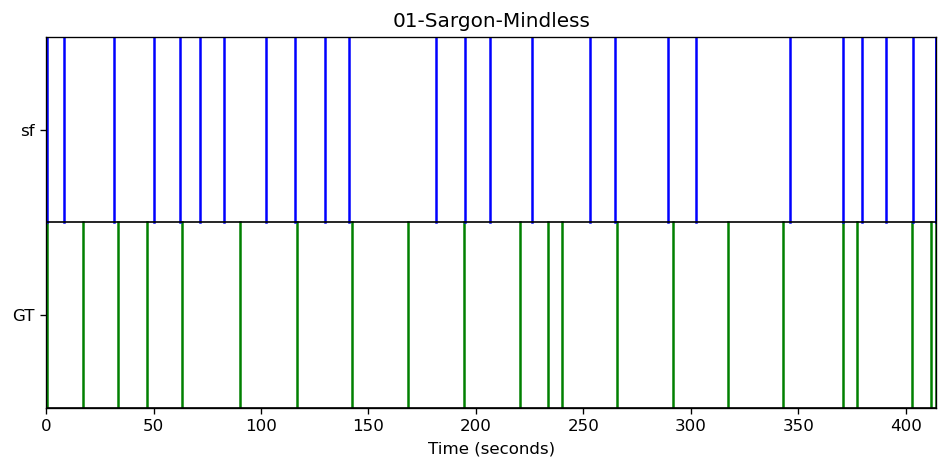

Estimated boundaries: [  0.           0.41795918   8.31274376  31.53269841  50.20154195
  62.4152381   71.61034014  82.8952381  102.21424036 115.72825397
 129.84598639 141.17732426 181.58004535 195.04761905 206.7969161
 226.301678   253.05106576 264.84680272 289.27419501 302.27736961
 345.97732426 371.05487528 379.59981859 390.83827664 403.46993197
 414.1046712  414.14530612]


In [35]:
boundaries, labels = msaf.process(audio_file, plot=True)
print("Estimated boundaries:", boundaries)

In [8]:
# Instantiate a pretrained EnCodec model
model = EncodecModel.encodec_model_24khz()
model.set_target_bandwidth(6.0)

In [20]:
# Load and pre-process the audio waveform
wav, sr = torchaudio.load(audio_file)
wav = wav[None, 0, :]
wav = wav.unsqueeze(0)
wav = convert_audio(wav, sr, model.sample_rate, model.channels)

In [21]:
wav = wav[..., : model.sample_rate * 10]

In [22]:
# Extract discrete codes from EnCodec
encoded_frames = model.encode(wav)

codes = torch.cat([encoded[0] for encoded in encoded_frames], dim=-1)

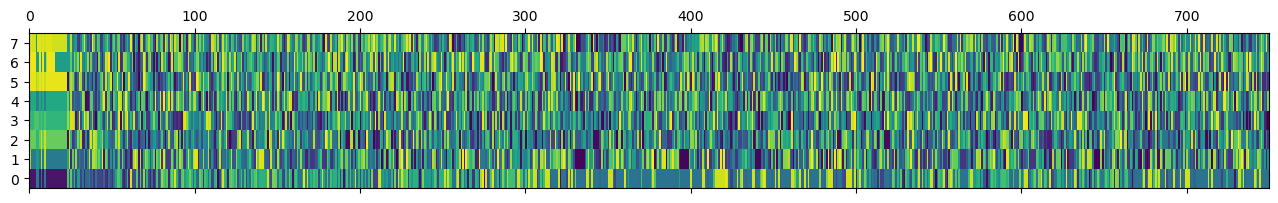

In [23]:
plt.matshow(codes[0], aspect="auto", origin="lower")

In [28]:
codes.shape

torch.Size([1, 8, 750])

In [31]:
decoded_audio = model.decode(encoded_frames)

In [34]:
import IPython.display as ipd

ipd.Audio(decoded_audio[0].detach().numpy(), rate=model.sample_rate)